In [25]:
import yaml
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = np.array(image).astype(np.float32)
    return image

In [27]:
with open('config.yaml', 'r') as file:
    CONFIG = yaml.safe_load(file)
x_pos = np.load(CONFIG['data_path']['x_pos'])
y_pos = np.load(CONFIG['data_path']['y_pos'])
image = load_image(CONFIG['data_path']['image'])
with open(CONFIG['data_path']['output_samples'], 'rb') as f:
    samples = np.load(f)
samples[:, 2:5] = np.clip(samples[:, 2:5], 0, 255)

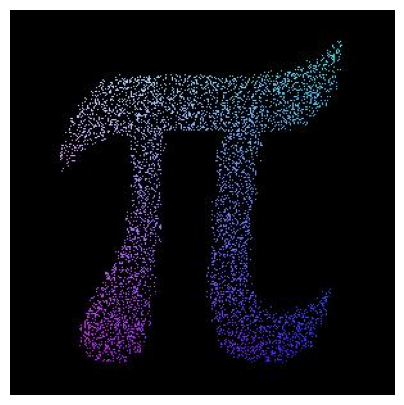

In [28]:
plt.figure(figsize=(5, 5))
plt.imshow(image / 255.0)
plt.axis('off')
plt.show()

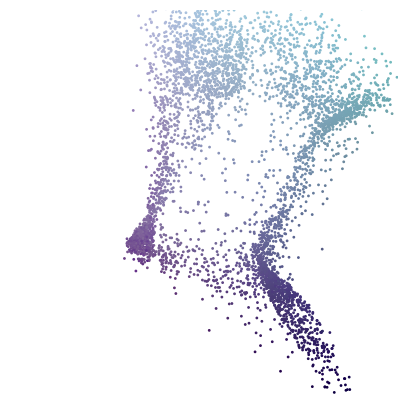

In [30]:
show_origin = False
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.xlim(0, 300)
plt.ylim(300, 0)
if show_origin:
    plt.imshow(image / 255.0, alpha=0.5)
plt.scatter(samples[:, 1], samples[:, 0], c=samples[:, 2:5] / 255, s=1)
plt.savefig(CONFIG['data_path']['output_image'], bbox_inches='tight', dpi=300)
plt.show()